In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import gc


In [33]:
train_data = pd.read_csv('tokenized.csv' )
train_data['text'] = train_data['company_profile'] + ' ' + train_data['description'] + ' ' + train_data['requirements'] + ' ' + train_data['benefits']
train_data.head()

,company_profile,description,requirements,benefits,fraudulent,text
0,"['food52', 'create', 'groundbreaking', 'award'...","['food52', 'fast', 'grow', 'jam', 'beard', 'aw...","['experience', 'content', 'management', 'syste...",['unspecified'],0,"['food52', 'create', 'groundbreaking', 'award'..."
1,"['90', 'second', 'worlds', 'cloud', 'video', '...","['organise', 'focus', 'vibrant', 'awesome', 'p...","['expect', 'key', 'responsibility', 'communica...","['get', 'usthrough', 'part', '90', 'second', '...",0,"['90', 'second', 'worlds', 'cloud', 'video', '..."
2,"['valor', 'service', 'provide', 'workforce', '...","['client', 'locate', 'houston', 'actively', 's...","['implement', 'pre', 'commission', 'commission...",['unspecified'],0,"['valor', 'service', 'provide', 'workforce', '..."
3,"['passion', 'improve', 'quality', 'life', 'geo...","['company', 'esri', 'environmental', 'systems'...","['education', 'bachelor', 'master', 'gi', 'bus...","['culture', 'anything', 'corporate', 'collabor...",0,"['passion', 'improve', 'quality', 'life', 'geo..."
4,"['spotsource', 'solutions', 'llc', 'global', '...","['job', 'title', 'itemization', 'review', 'man...","['qualifications', 'rn', 'license', 'state', '...","['full', 'benefit', 'offer']",0,"['spotsource', 'solutions', 'llc', 'global', '..."


In [34]:
print('Shape of training data :',train_data.shape)

Shape of training data : (17880, 6)


In [58]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)

def kfcv(model, X_train, y_train):
    crossvalidation = cross_val_score(model,X_train, y_train, cv = kfold, scoring = 'f1');
    count = 1
    for score in crossvalidation:
        print(f"F1 Score {count}: {score :.2f}")
        count +=1

    print(f"Total F1 Mean: {crossvalidation.mean() :.2f}")

# Check the words 'learnt' by vectorizer

In [39]:
tfidf.vocabulary_

{'casumo': 7060,
 'company': 8742,
 'technology': 43309,
 'startup': 40999,
 'form': 17512,
 '2012': 411,
 'product': 33097,
 'recognize': 34943,
 'award': 4576,
 'win': 48277,
 'online': 28812,
 'casino': 7042,
 'concept': 9114,
 'though': 43918,
 'literally': 24023,
 'whole': 48195,
 'new': 27812,
 'universe': 45462,
 'work': 48451,
 'change': 7373,
 'common': 8586,
 'perception': 30546,
 'design': 11871,
 'amp': 2656,
 'innovation': 21291,
 'aim': 2357,
 'disrupt': 12875,
 'young': 48947,
 'many': 25233,
 'ways': 47841,
 'immature': 20453,
 'industry': 20945,
 'ignore': 20355,
 'rule': 37667,
 'find': 17039,
 'upon': 45666,
 'single': 39395,
 'promise': 33800,
 'want': 47747,
 'deliver': 11382,
 'world': 48634,
 'best': 5289,
 'game': 18126,
 'experience': 16065,
 'bullet': 6237,
 'brand': 5869,
 'book': 5707,
 'believe': 5154,
 'understand': 45357,
 'data': 10837,
 'play': 31547,
 'key': 22874,
 'role': 37402,
 'goal': 18561,
 'doingas': 13176,
 'scientist': 38264,
 'across': 1636,

# SGDClassifier

In [59]:
start = time.time()
sgd = SGDClassifier(loss="modified_huber", penalty="l2", shuffle=True, random_state=420)
cat_var = ["company_profile","description","benefits","requirements", "text"]



count = 0
cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(sgd,X_train_tfidf, y_train)
    
    sgd.fit(X_train_tfidf, y_train)
    y_predicted = sgd.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))

    cm_predicted.append(y_predicted)
    
end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")


Prediction of company_profile
F1 Score 1: 0.49
F1 Score 2: 0.44
F1 Score 3: 0.39
F1 Score 4: 0.48
F1 Score 5: 0.49
Total F1 Mean: 0.46
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3410
           1       1.00      0.32      0.48       166

    accuracy                           0.97      3576
   macro avg       0.98      0.66      0.73      3576
weighted avg       0.97      0.97      0.96      3576

Prediction of description
F1 Score 1: 0.68
F1 Score 2: 0.67
F1 Score 3: 0.73
F1 Score 4: 0.72
F1 Score 5: 0.72
Total F1 Mean: 0.70
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3396
           1       0.96      0.59      0.73       180

    accuracy                           0.98      3576
   macro avg       0.97      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576

Prediction of benefits
F1 Score 1: 0.49
F1 Score 2: 0.49
F1 Score 3: 0.54
F1 Sco

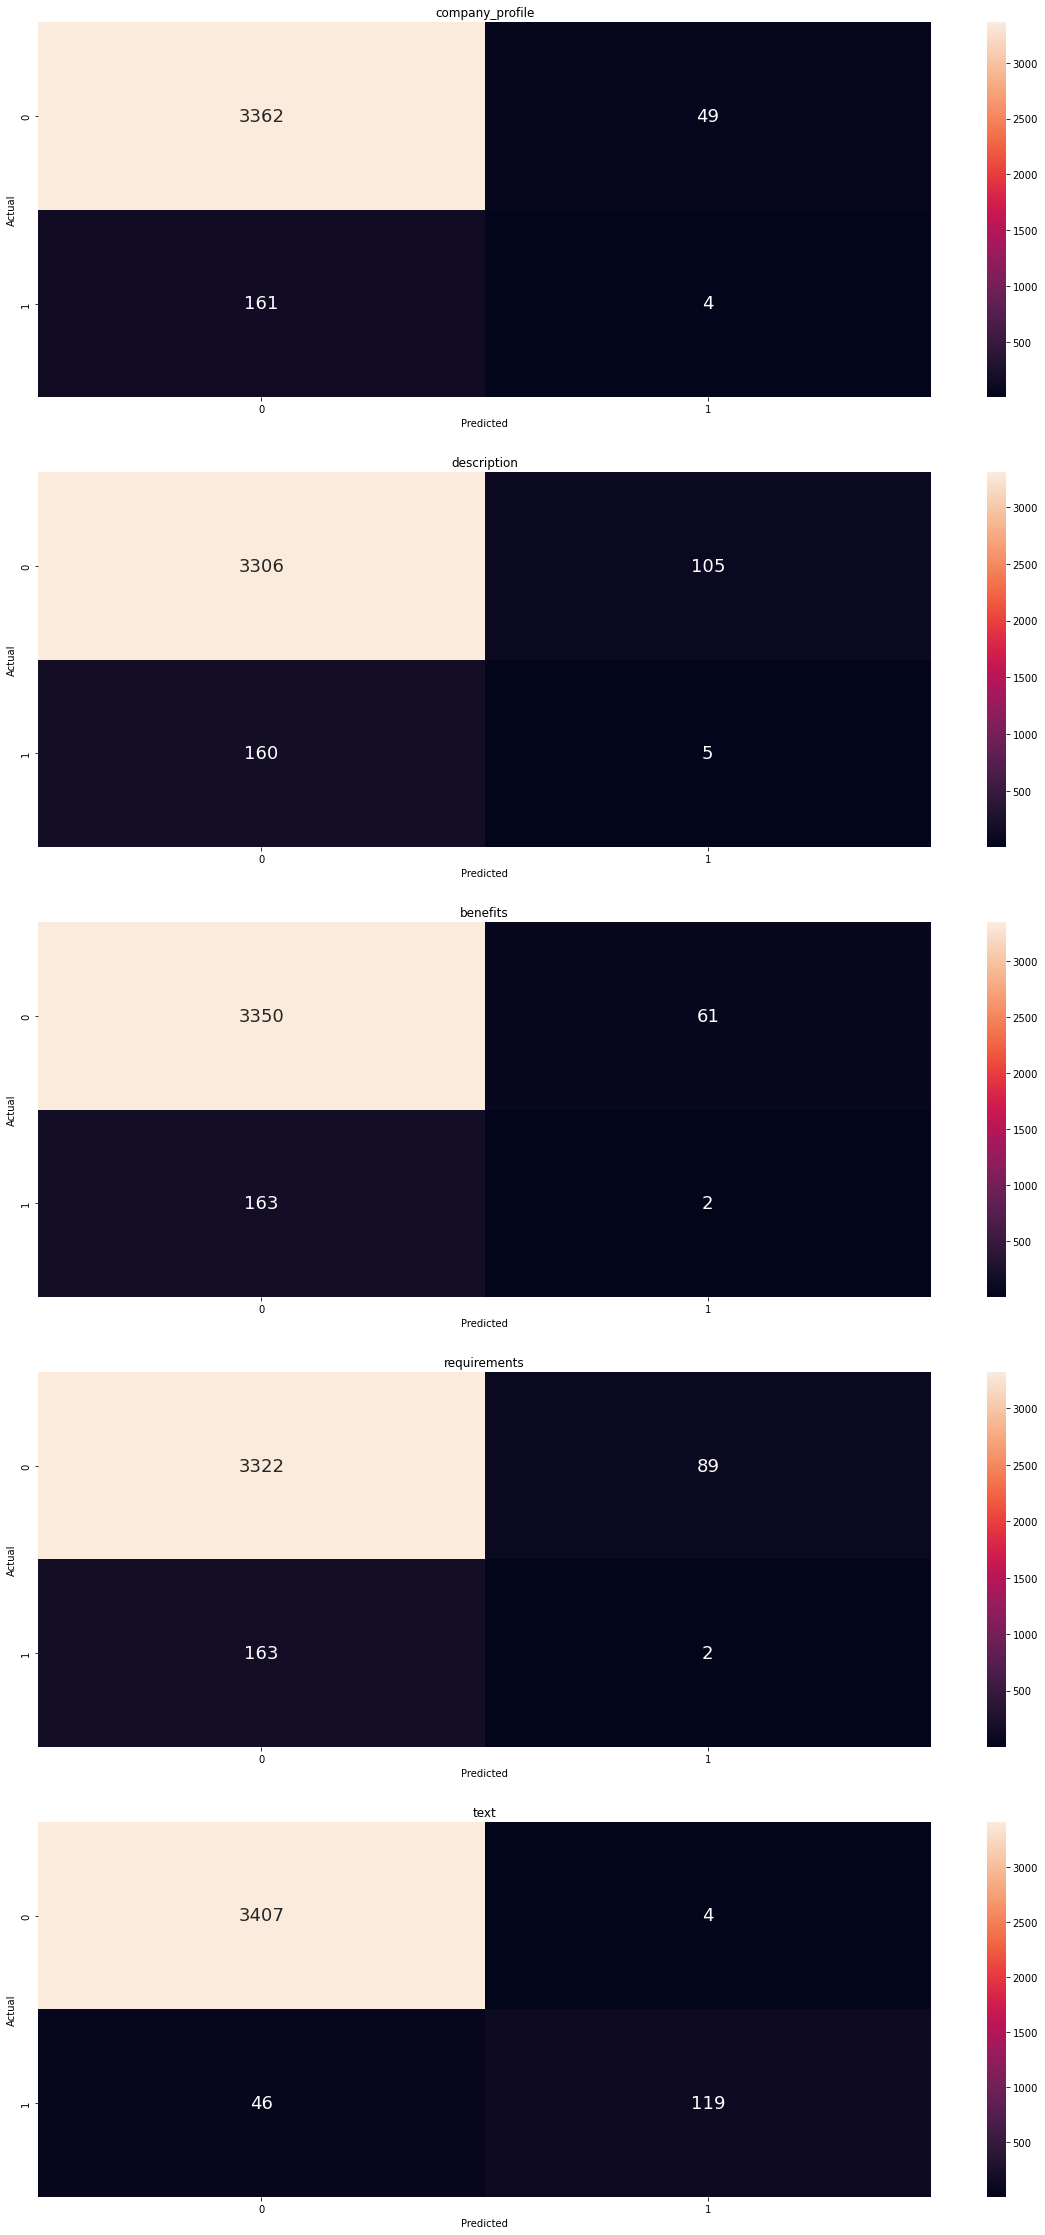

In [60]:

f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=sgd.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])


# Understanding confusion matrix #
00: True Positive - Job postings that are legitimate and identified as legitimate

11: True Negative - Job postings that are fraudulent and identified as fraudulent

01: False Positive - Job postings that are legitimate but identified as fraudulent

10: False Negative - Job postings that are fraudulent but identified as legitimate

# Random Forest Classifier

In [19]:
start = time.time()
regr=RandomForestClassifier(n_estimators = 200, max_features = "sqrt", random_state = 420)
cat_var = ["company_profile","description","benefits","requirements", "text"]

cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(regr,X_train_tfidf, y_train)
    
    regr.fit(X_train_tfidf, y_train)
    y_predicted = regr.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))
    cm_predicted.append(y_predicted)
    
end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")

Prediction of company_profile
F1 Score 1: 0.70
F1 Score 2: 0.72
F1 Score 3: 0.69
F1 Score 4: 0.73
F1 Score 5: 0.77
Total F1 Mean: 0.72
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3406
           1       1.00      0.31      0.48       170

    accuracy                           0.97      3576
   macro avg       0.98      0.66      0.73      3576
weighted avg       0.97      0.97      0.96      3576

Prediction of description
F1 Score 1: 0.82
F1 Score 2: 0.82
F1 Score 3: 0.84
F1 Score 4: 0.84
F1 Score 5: 0.84
Total F1 Mean: 0.83
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3418
           1       0.97      0.65      0.78       158

    accuracy                           0.98      3576
   macro avg       0.98      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576

Prediction of benefits
F1 Score 1: 0.74
F1 Score 2: 0.78
F1 Score 3: 0.76
F1 Sco

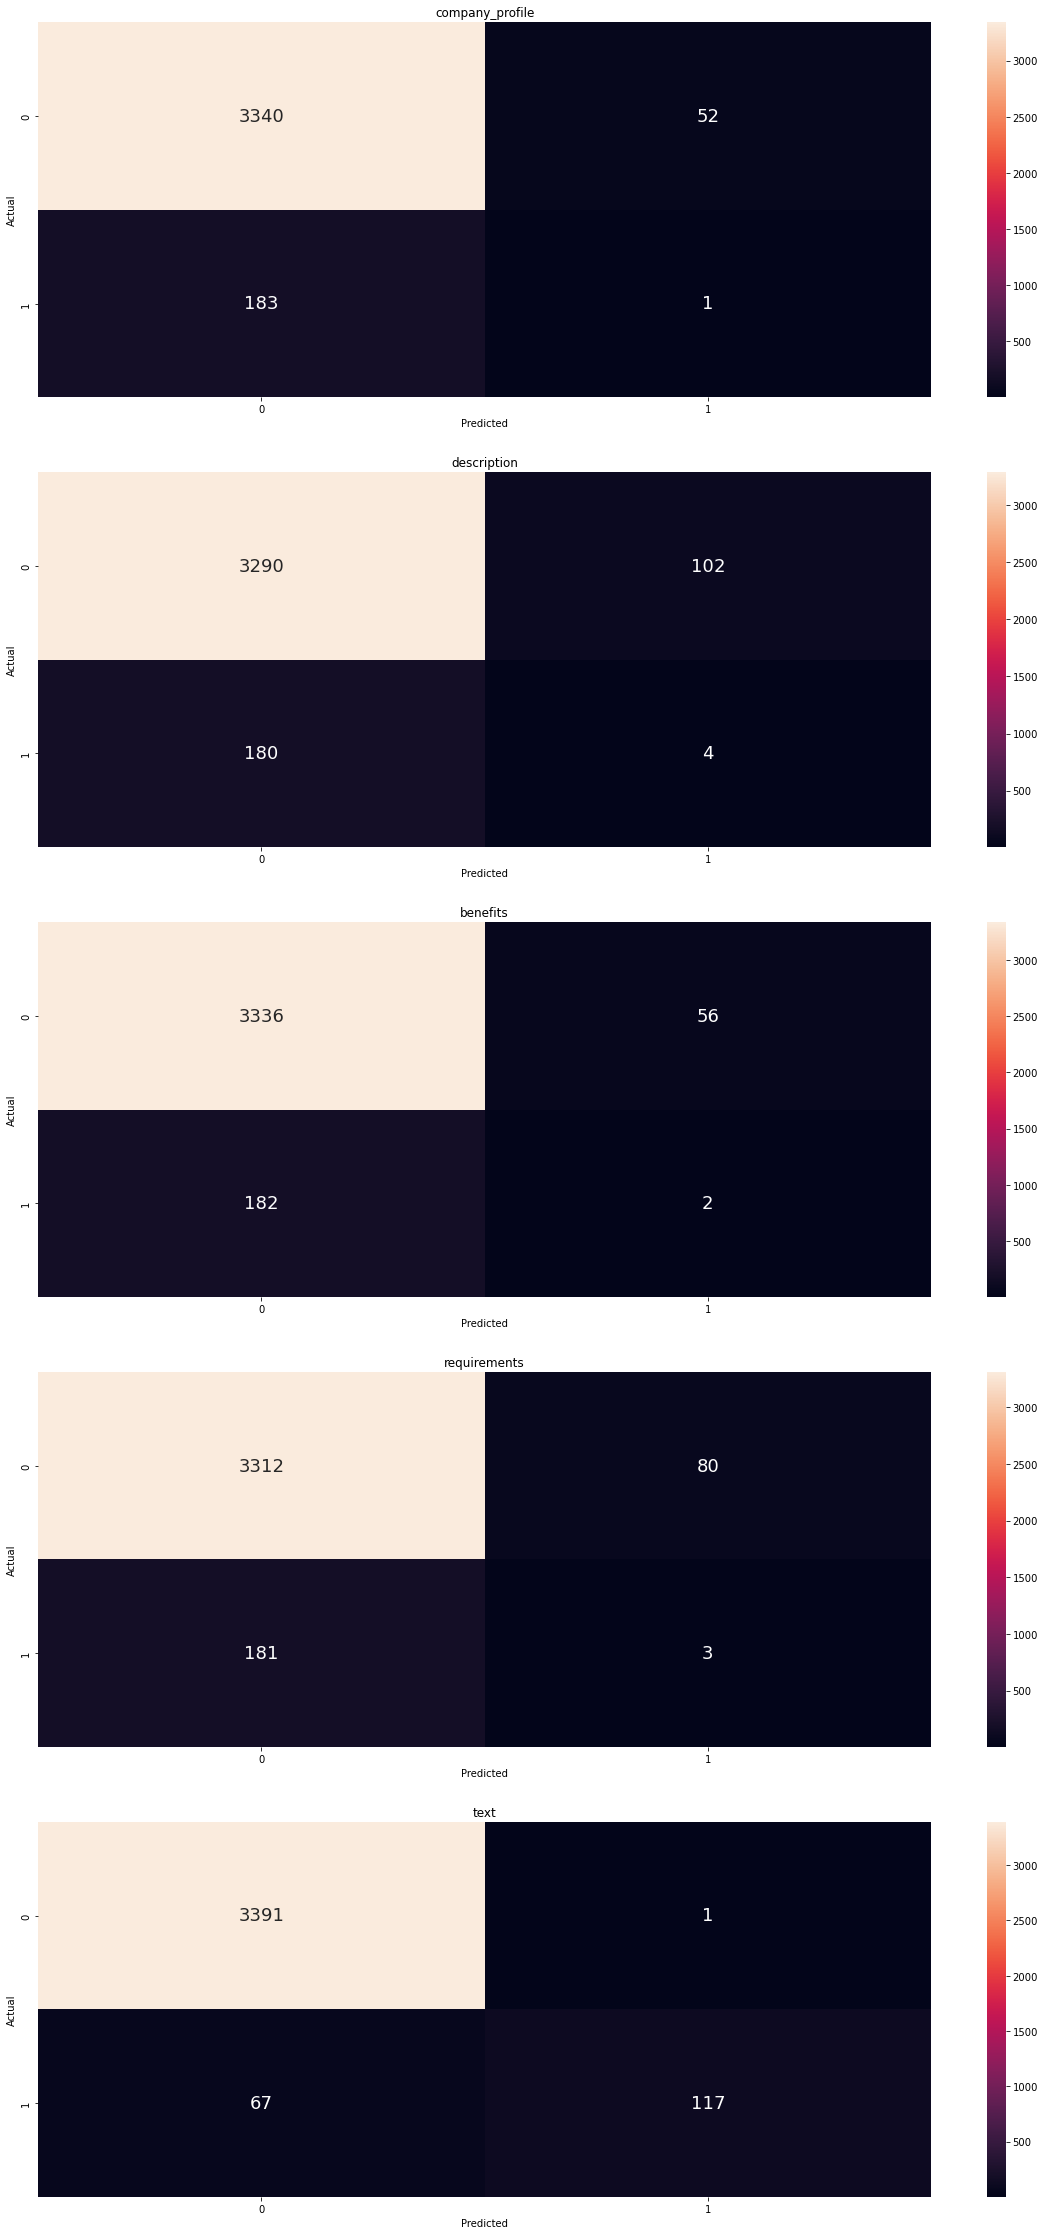

In [21]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=regr.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])


# K-Neighbours #


In [22]:
start = time.time()
neigh = KNeighborsClassifier(weights="distance")

cat_var = ["company_profile","description","benefits","requirements", "text"]

cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(neigh,X_train_tfidf, y_train)
    
    neigh.fit(X_train_tfidf, y_train)
    y_predicted = neigh.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))
    cm_predicted.append(y_predicted)

end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")



Prediction of company_profile
F1 Score 1: 0.77
F1 Score 2: 0.71
F1 Score 3: 0.74
F1 Score 4: 0.63
F1 Score 5: 0.64
Total F1 Mean: 0.70
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3391
           1       0.90      0.25      0.39       185

    accuracy                           0.96      3576
   macro avg       0.93      0.62      0.68      3576
weighted avg       0.96      0.96      0.95      3576

Prediction of description
F1 Score 1: 0.84
F1 Score 2: 0.84
F1 Score 3: 0.84
F1 Score 4: 0.86
F1 Score 5: 0.82
Total F1 Mean: 0.84
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3411
           1       0.68      0.76      0.72       165

    accuracy                           0.97      3576
   macro avg       0.83      0.87      0.85      3576
weighted avg       0.97      0.97      0.97      3576

Prediction of benefits
F1 Score 1: 0.75
F1 Score 2: 0.77
F1 Score 3: 0.76
F1 Sco

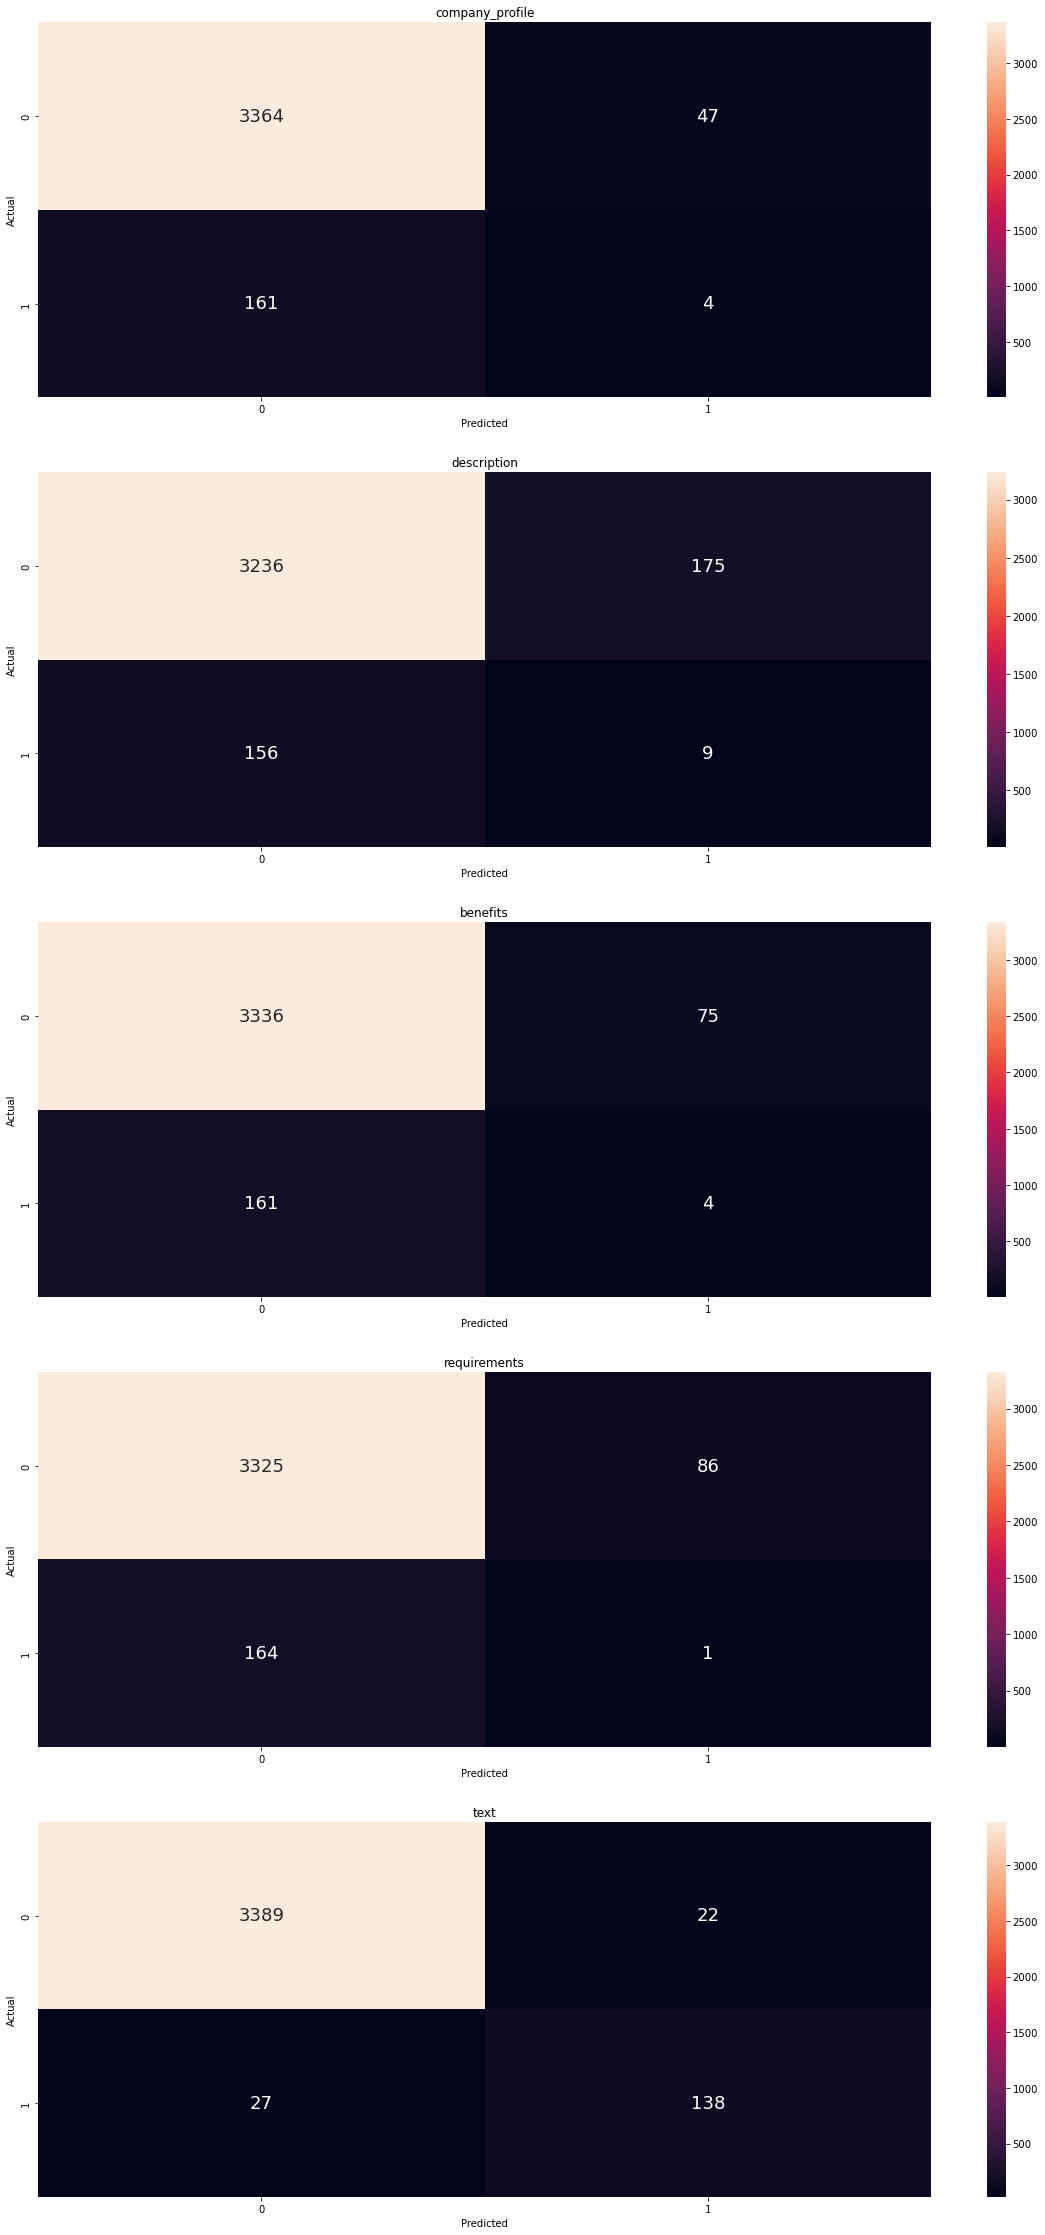

In [24]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=neigh.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])

# Keras (Very Hardware Intensive) #

In [65]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [71]:
cat_var = ["company_profile","description","benefits","requirements", "text"]
#cat_var = ["company_profile"]
cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    # model specifications
    #=============================================================================================
    model = Sequential()
    #model.add(Dense(units = 2000, activation = 'relu',input_dim=X_train_tfidf.shape[1]))
    #model.add(Dense(units = 1500 , activation = 'relu'))
    #model.add(Dense(units = 750 , activation = 'relu'))
    #model.add(Dense(units = 325 , activation = 'relu'))
    #model.add(Dense(units = 160 , activation = 'relu'))
    model.add(Dense(units = 50 , activation = 'relu',input_dim=X_train_tfidf.shape[1]))
    model.add(Dense(units = 30 , activation = 'relu'))
    model.add(Dense(units = 15 , activation = 'relu'))
    model.add(Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    #saving weights before running kfold to retain integrity
    model.save_weights('model.h5')
    #==============================================================================================
    
    
    
    X_train_tfidf = X_train_tfidf.toarray()
    X_test_tfidf = X_test_tfidf.toarray()
    
    fold_no = 1
    scores = []
    
    for train, test in kfold.split(X_train_tfidf,y_train):

        #resets model to starting point
        model.load_weights('model.h5')
        train_X, test_X = X_train_tfidf[train], X_train_tfidf[test]
        train_y, test_y = y_train.iloc[train], y_train.iloc[test]

        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        model.fit(train_X,train_y, epochs = 5, batch_size = 10)
        pred_cv = model.predict(test_X)
        pred_cv = np.around(pred_cv , decimals = 0)
        scores.append(f1_score(test_y,pred_cv))
        # Increase fold number
        fold_no = fold_no + 1

        #garbage collection
        tf.keras.backend.clear_session()
        del train_X,test_X,train_y,test_y,pred_cv
        gc.collect()
    
    print() 
    total = 0
    count = 1
    for sc in scores:
        total = total + sc
        print(f"F1 Score of Fold {count}: {sc: .5f}")
        count +=1

    total = total/(fold_no-1)
    print(f"F1 Score Mean:      {total: .5f}")
    print("======================================")
    print("Test Set")
    print("======================================")
    tf.keras.backend.clear_session()
    gc.collect()
    
    model.load_weights('model.h5')
    model.fit(X_train_tfidf,y_train, epochs = 5)
    pred_cv = model.predict(X_test_tfidf)
    pred_cv = np.around(pred_cv , decimals = 0)
    print(classification_report(y_test, pred_cv))
    cm_predicted.append(y_predicted)
    
    tf.keras.backend.clear_session()
    gc.collect()

Prediction of company_profile
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1145/1145 [==============================] - 5s 4ms/step - loss: 0.1356 - accuracy: 0.9587
Epoch 2/5
1145/1145 [==============================] - 5s 4ms/step - loss: 0.0882 - accuracy: 0.9676
Epoch 3/5
1145/1145 [==============================] - 5s 4ms/step - loss: 0.0862 - accuracy: 0.9682
Epoch 4/5
1145/1145 [==============================] - 5s 4ms/step - loss: 0.0860 - accuracy: 0.9681
Epoch 5/5
1145/1145 [==============================] - 5s 4ms/step - loss: 0.0858 - accuracy: 0.9682
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2726
           1       1.00      0.32      0.48       135

    accuracy                           0.97      2861
   macro avg       0.98      0.66      0.73      2861
weighted avg       0.97      0.97      0.96      2861

0.4831460674157304
----------------------

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [68]:
tf.keras.backend.clear_session()
#del train_X,test_X,train_y,test_y,pred_cv
gc.collect()

100

<AxesSubplot:>

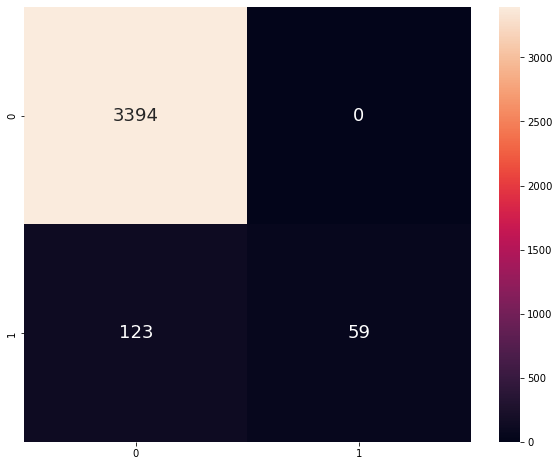

In [69]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test,pred_cv)
sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18})

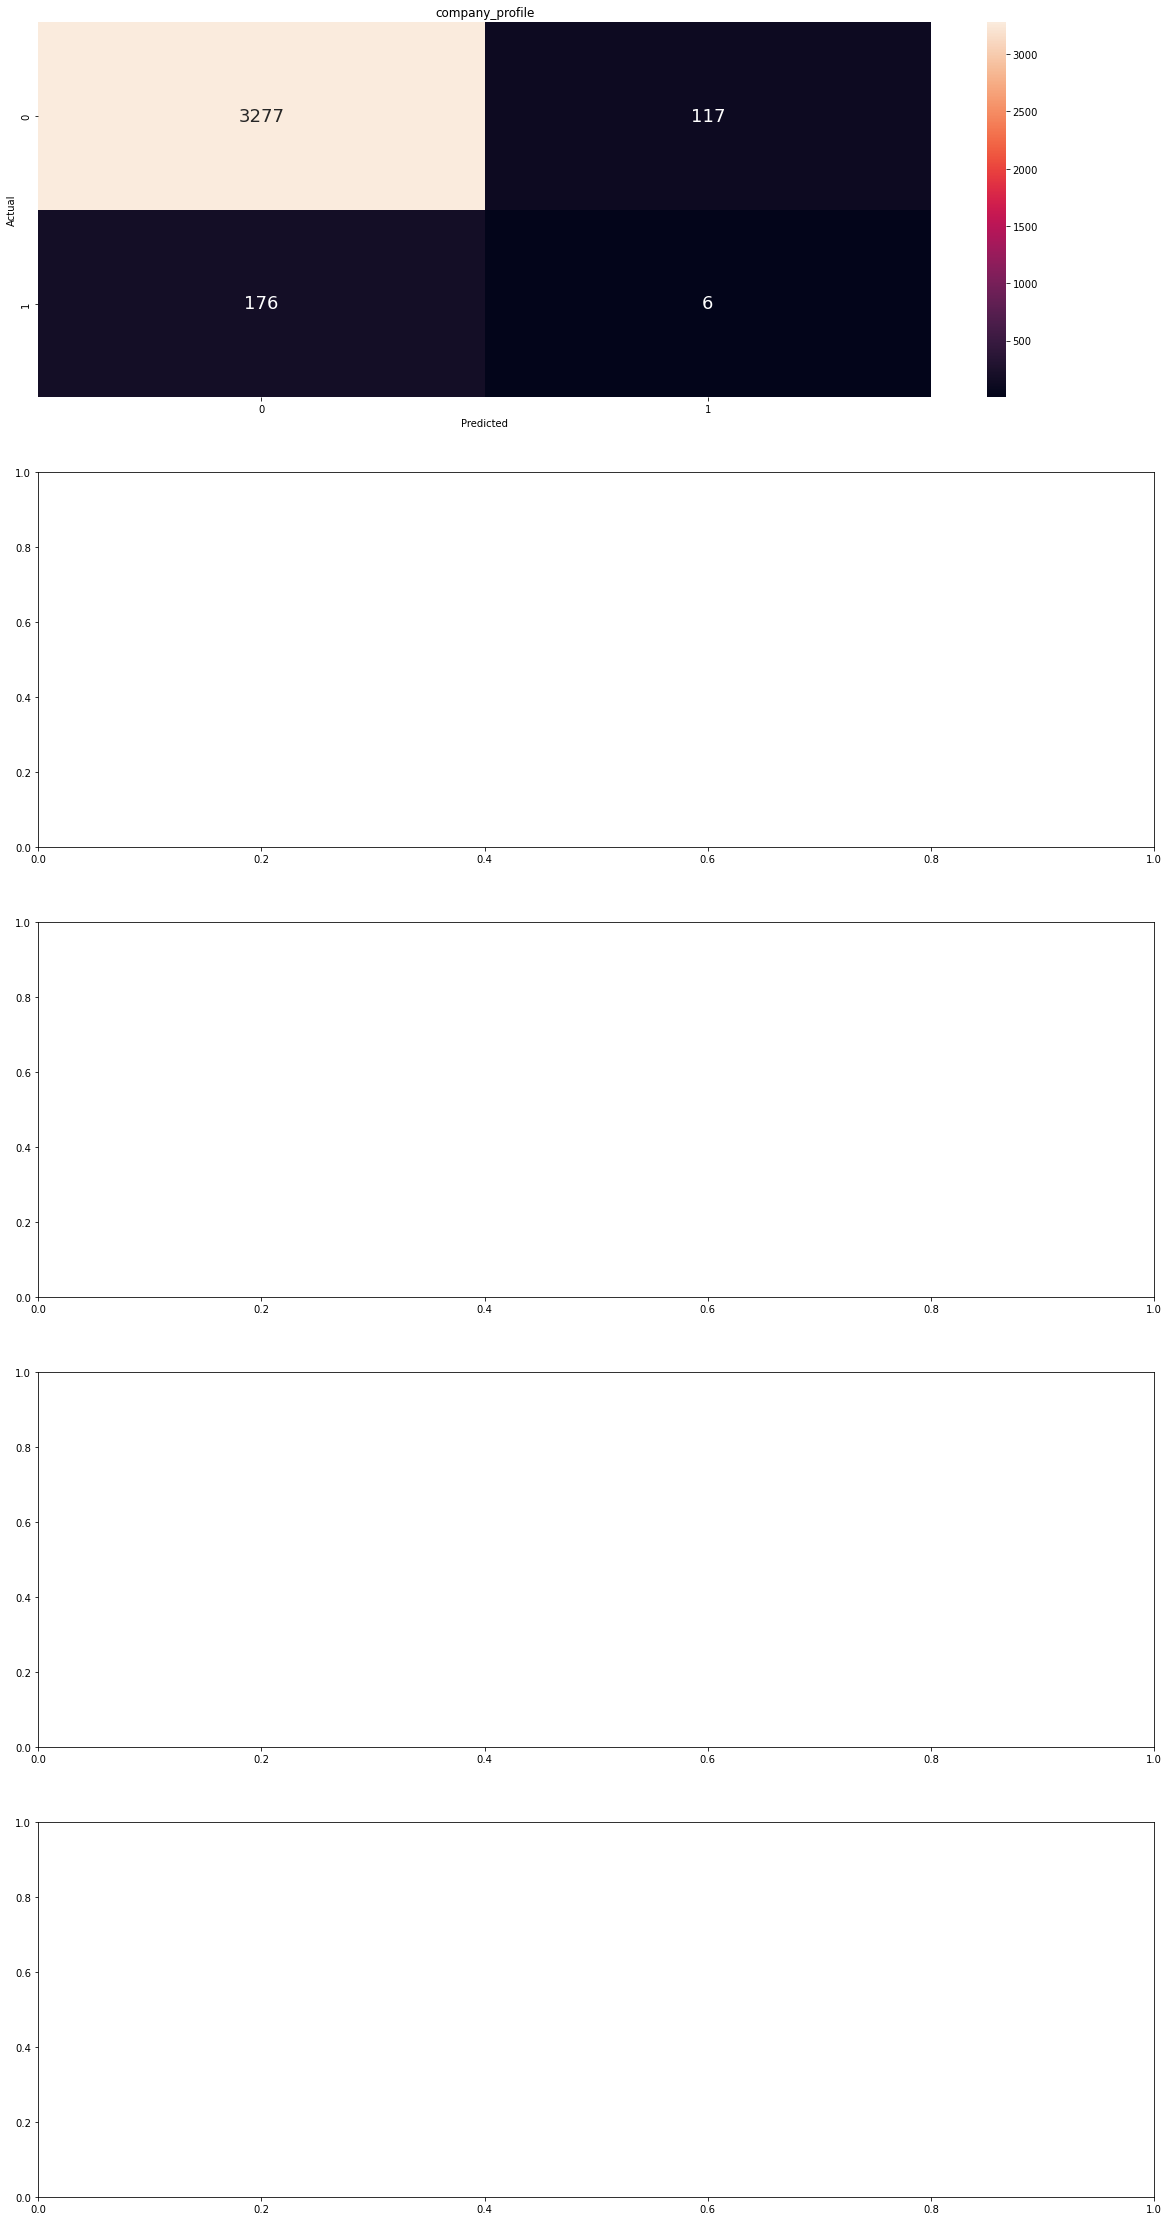

In [70]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i])
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])